**Table of contents**<a id='toc0_'></a>    
- [Group 1](#toc1_)    
    - [Marc Bitar, Davin Patel, Rishabh Jain, Beau Tse](#toc1_1_1_)    
  - [Import and Load Data](#toc1_2_)    
- [Preprocess](#toc2_)    
        - [Import Data into code](#toc2_1_1_1_1_)    
        - [Scale the data](#toc2_1_1_1_2_)    
    - [Problems](#toc2_1_2_)    
- [Predicting the Need for Educational Support](#toc3_)    
      - [Models](#toc3_1_1_1_)    
        - [Random Forest](#toc3_1_1_1_1_)    
      - [Logistic Regression Model](#toc3_1_1_2_)    
- [Which feature are most influential on alcohol consumptions, comparison between weekday and weekend](#toc4_)    
  - [DALC](#toc4_1_)    
          - [Dalc ~ choosen because we are examining school factors on alcohol consumption which transpires on week days](#toc4_1_1_1_1_1_)    
    - [Random Forest Entropy](#toc4_1_2_)    
    - [Logistic Regression](#toc4_1_3_)    
  - [Walc](#toc4_2_)    
    - [Random Forest Entropy](#toc4_2_1_)    
    - [Logistic Regression](#toc4_2_2_)    
- [Can we predict if kids are interested in higher education and target these students](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Group 1](#toc0_)
### <a id='toc1_1_1_'></a>[Marc Bitar, Davin Patel, Rishabh Jain, Beau Tse](#toc0_)


## <a id='toc1_2_'></a>[Import and Load Data](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# <a id='toc2_'></a>[Preprocess](#toc0_)

##### <a id='toc2_1_1_1_1_'></a>[Import Data into code](#toc0_)

Import the data

In [ ]:
df_math = pd.read_csv('Maths.csv')
df_portuguese = pd.read_csv('Portuguese.csv')

Create a new column that references the data source

In [ ]:
df_math['subject'] = 'math'
df_portuguese['subject'] = 'portuguese'

Concatanate the two datasources into one parent data frame.

The datasets contain the same features, as such it overlays without challenges, with its parent source referenced in the subject column.

In [ ]:
df = pd.concat([df_math, df_portuguese])

##### <a id='toc2_1_1_1_2_'></a>[Scale the data](#toc0_)

A column is created that averages the grade across all three trimesters for students, to determine overall grade of student.

In [ ]:
df['Average_Grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

The average grade data is manually processed into four categories to be reflective of the United States of America Grading system. With the higher the label corresponding to the better grade ~ akin to the closer to an A the better the grade.

In [ ]:
df.loc[(df['Average_Grade'] >= 0) & (df['Average_Grade'] < 10), 'Average_Grade'] = 0
df.loc[(df['Average_Grade'] >= 10) & (df['Average_Grade'] < 14), 'Average_Grade'] = 1
df.loc[(df['Average_Grade'] >= 14) & (df['Average_Grade'] <= 16), 'Average_Grade'] = 2
df.loc[(df['Average_Grade'] > 16) & (df['Average_Grade'] <= 20), 'Average_Grade'] = 3

Columns are renamed from parent source to be easier to understand for viewers

In [ ]:
df = df.rename(columns={'Pstatus': 'parent_cohabitation_status', 'Medu': 'mother_education', \
                             'Fedu': 'father_education', 'Mjob': 'mother_job', 'Fjob': 'father_job',\
                                'reason': 'reason_to_choose_school', 'famrel': 'fam_relationship_quality',\
                                    'Dalc': 'workday_alcohol_consumption', 'higher': 'wants_higher_edu',\
                                        'romantic': 'in_romantic_relationship', 'Walc': 'weekend_alcohol_consumption',\
                                            'goout': 'going_out_with_friends', 'freetime': 'freetime_after_school',\
                                                'guardian': 'students_guardian', 'traveltime': 'travel_time_to_school',\
                                                    'address': 'location_type', 'G1': 'first_period_grade', 'G2': 'second_period_grade',\
                                                        'G3': 'third_period_grade', 'schoolsup': 'extra_educational_support',\
                                                            'famsup': 'family_educational_support', 'paid': 'extra_paid_classes_within_the_course',\
                                                                'activities': 'extra_curricular_activities', 'nursery': 'attended_nursery_school',\
                                                                    'internet': 'home_internet_access', 'failures': 'past_class_failures'})
df.columns

Index(['school', 'sex', 'age', 'location_type', 'famsize',
       'parent_cohabitation_status', 'mother_education', 'father_education',
       'mother_job', 'father_job', 'reason_to_choose_school',
       'students_guardian', 'travel_time_to_school', 'studytime',
       'past_class_failures', 'extra_educational_support',
       'family_educational_support', 'extra_paid_classes_within_the_course',
       'extra_curricular_activities', 'attended_nursery_school',
       'wants_higher_edu', 'home_internet_access', 'in_romantic_relationship',
       'fam_relationship_quality', 'freetime_after_school',
       'going_out_with_friends', 'workday_alcohol_consumption',
       'weekend_alcohol_consumption', 'health', 'absences',
       'first_period_grade', 'second_period_grade', 'third_period_grade',
       'subject', 'Average_Grade'],
      dtype='object')

### <a id='toc2_1_2_'></a>[Problems](#toc0_)

# <a id='toc3_'></a>[Predicting the Need for Educational Support](#toc0_)

Create and initalize three variables that references the feature names according to data type.

In [ ]:
continuous_columns = ['age']
nominal_columns = ['school','sex' ,'location_type' ,'famsize' ,'parent_cohabitation_status','mother_education' ,'father_education','mother_job' ,'father_job','reason_to_choose_school' ,'students_guardian','travel_time_to_school',
'studytime','family_educational_support' ,'extra_paid_classes_within_the_course' ,'extra_curricular_activities' ,'attended_nursery_school' ,'wants_higher_edu' ,'home_internet_access' ,'in_romantic_relationship', 'subject']
ordinal_columns = ['fam_relationship_quality', 'freetime_after_school', 'going_out_with_friends', 'workday_alcohol_consumption', 'weekend_alcohol_consumption', 'health']

Organize the training data into independent features (x) and dependent features (y), this will be the data used to fit and determine insights from the model.

In [ ]:
X = df[['age','school','sex' ,'location_type' ,'famsize' ,'parent_cohabitation_status','mother_education' ,'father_education','mother_job' ,'father_job','reason_to_choose_school' ,'students_guardian','travel_time_to_school',
'studytime','family_educational_support' ,'extra_paid_classes_within_the_course' ,'extra_curricular_activities' ,'attended_nursery_school' ,'wants_higher_edu' ,'home_internet_access' ,'in_romantic_relationship', 'subject',
'fam_relationship_quality', 'freetime_after_school', 'going_out_with_friends', 'workday_alcohol_consumption', 'weekend_alcohol_consumption', 'health']]
y = df['extra_educational_support']

Establish a column transformer that will be used to preprocess the data. The column transformer will later be initalized in the pipeline as the first step of the pipeline to ensure proper scaling of the data.

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns),
        ('continuous', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),
    ],
    remainder='drop'
)

#### <a id='toc3_1_1_1_'></a>[Models](#toc0_)

The data is split into training and testing data: 1) training data to train the model 2) testing data that will be applied to the trained model to predict insights.

Random state is set to determine a form of consistency across run times. Furthermore, no testing size / training size is coded, as such default split is applied -- 75% training data and 25% testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, shuffle = True, random_state = 42)

#### <a id='toc3_1_1_1_'></a>[AutoGluon](#toc0_)

A new variable is initalized that applies the column transformer to hold the preprocessed independent features.

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

Data is split once more, instead having the preprocessed data. This is done so that when autogluon is ran it can use the data without having to fit through pipeline.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,  y, shuffle = True, random_state = 42)

Adjust the properties of the dataframe to ensure it is of the right shape for autogluon.

In [ ]:
train_df = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

Train the autogluon model using the data provided, providing the basis to compare accuracy across a number of machine learning models.

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(train_df)

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
from autogluon.tabular import TabularPredictor
save_path = 'any'
label = 'extra_educational_support' # specifies which column do we want to predict
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, time_limit=600)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "any"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.2.0: Wed Nov 15 21:54:10 PST 2023; root:xnu-10002.61.3~2/RELEASE_X86_64
CPU Count:          8
Memory Avail:       2.44 GB /

In [ ]:
test_data = TabularDataset(test_df)
y_test = test_data[label] # values to predict

In [ ]:
test_data_nolab = test_data.drop(columns=[label])

Load the file containing the data on the initalized autogluon model.

In [ ]:
predictor = TabularPredictor.load(save_path)

In [ ]:
y_pred = predictor.predict(test_data_nolab)

Display the leaderboard of machine learning models and their respective accuracy score to determine insights into how models will perform with the provided data.

In [ ]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics={'auc'})
leaderboard = predictor.leaderboard(test_data, silent=True)
display(leaderboard, perf)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,0.931034,0.961783,accuracy,0.020493,0.019080,0.011230,0.020493,0.019080,0.011230,1,True,2
1,CatBoost,0.923372,0.974522,accuracy,0.021642,0.003838,1.301441,0.021642,0.003838,1.301441,1,True,5
2,WeightedEnsemble_L2,0.923372,0.974522,accuracy,0.024631,0.004782,2.110486,0.002989,0.000944,0.809045,2,True,11
3,RandomForestGini,0.919540,0.961783,accuracy,0.200351,0.076795,0.838053,0.200351,0.076795,0.838053,1,True,3
4,ExtraTreesGini,0.915709,0.961783,accuracy,0.165178,0.078910,0.767188,0.165178,0.078910,0.767188,1,True,6
5,RandomForestEntr,0.915709,0.961783,accuracy,0.278559,0.082648,0.783032,0.278559,0.082648,0.783032,1,True,4
6,ExtraTreesEntr,0.911877,0.961783,accuracy,0.113658,0.077619,0.877747,0.113658,0.077619,0.877747,1,True,7
7,KNeighborsUnif,0.900383,0.891720,accuracy,0.020551,0.045150,3.349767,0.020551,0.045150,3.349767,1,True,1
8,NeuralNetFastAI,0.900383,0.942675,accuracy,0.020972,0.017856,2.099070,0.020972,0.017856,2.099070,1,True,8
9,XGBoost,0.892720,0.942675,accuracy,0.017609,0.006480,0.378403,0.017609,0.006480,0.378403,1,True,9


{'accuracy': 0.9233716475095786,
 'balanced_accuracy': 0.6702586206896552,
 'mcc': 0.5326178913459613,
 'f1': 0.5000000000000001,
 'precision': 0.9090909090909091,
 'recall': 0.3448275862068966}

##### <a id='toc3_1_1_1_1_'></a>[Random Forest](#toc0_)

The data is split from the parent data frame, that is not preprocessed, into training and testing data.

Random state is set to determine a form of consistency across run times. Furthermore, no testing size / training size is coded, as such default split is applied -- 75% training data and 25% testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, shuffle = True, random_state = 42)

A pipeline is defined with an associated parameter grid. The pipeline outlines the steps for the random forest classifier model that will be initalized a) preprocess the data for the model b) initalize the model.

when initalizing the model, a parameter grid is applied with scoring functionality "ROC_AUC" to determine the optimal hyperparameters that will raise AUC score. The gridsearch CV is ran with a CV of 5 to look at how the model performs across a number of folds.

Once the grid search model is initalized, the model reports the optimal AUC score determined with the model's optimal hyperparameters defined in the grid search.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='gini'))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [400, 800, 1100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
rand_forest_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("AUC Score:", rand_forest_auc_score)


AUC Score: 0.8478002378121284


Feature importance is visualized to offer a visual insight into how features played a pivotal role across the number of tree models. It is sorted in descending order to showcase which features was most influential to least influential.

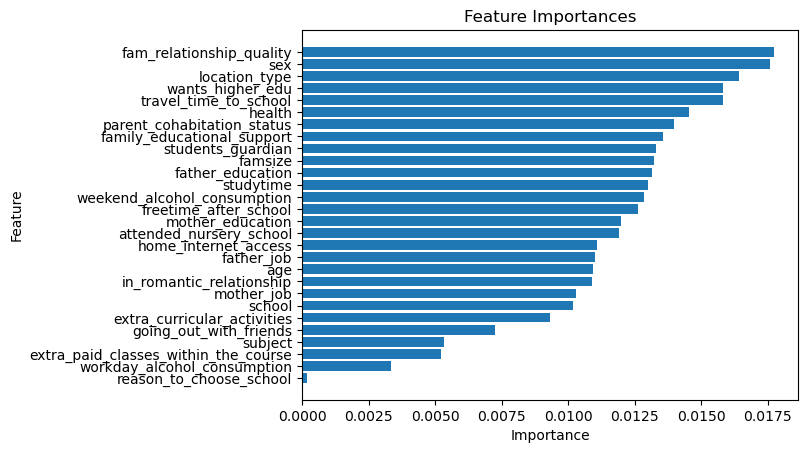

In [ ]:
import matplotlib.pyplot as plt
# Get the Random Forest Classifier model from the pipeline
rand_forest = best_model.named_steps['classifier']

# Get the feature importances from the Random Forest Classifier model
importances = rand_forest.feature_importances_

# Get the feature names from the dataset
feature_names = list(X_train.columns)

# Create a dictionary where the keys are the feature names and the values are the feature importances
feature_importances = dict(zip(feature_names, importances))

# Sort the dictionary by the feature importance values in ascending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=False))

# Plot the results in a horizontal bar chart
plt.barh(list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

A confusion matrix is visualized to further outline how the model performed in determining labels -- True Negative, False Negative, False Positive, True Positive.

The model outlines a high false negative score, meaning the model more often than not correctly predicted a label as false.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and made predictions
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the quadrants
quadrants = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Use the Blues colormap for a softer gradient
disp.plot(cmap='Blues', ax=ax)

#### <a id='toc3_1_1_2_'></a>[Logistic Regression Model](#toc0_)

A pipeline is defined with an associated parameter grid. The pipeline outlines the steps for the random forest classifier model that will be initalized a) preprocess the data for the model b) initalize the model.

when initalizing the model, a parameter grid is applied with scoring functionality "ROC_AUC" to determine the optimal hyperparameters that will raise AUC score. The gridsearch CV is ran with a CV of 5 to look at how the model performs across a number of folds.

Once the grid search model is initalized, the model reports the optimal AUC score determined with the model's optimal hyperparameters defined in the grid search and which specific parameters it applied.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the pipeline
pipeline = Pipeline([

    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
log_reg_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Get the optimal parameters
optimal_params = grid_search.best_params_

# Output the results
print("AUC Score:", log_reg_auc_score)
print("Optimal Parameters:", optimal_params)



AUC Score: 0.7079369797859691
Optimal Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}


Coefficient values for columns in the model is visualized to offer a visual insight into the relationship of features in predicting log odds.

Depending on the sign of the coefficient (if positive or negative) the relationship of the feature is defined. Positve coefficient values determine a positive relationship, where an increase in that feature will raise log odds. Negative coefficient values determine a negative relationship, where a decrease in that feature will decrease log odds.

The coefficient integer values determine the magnitude of the relationship. A higher integer value (closter to 1 or -1) means a stronger relationship, a lesser integer value (closer to 0) means a weaker relationship.

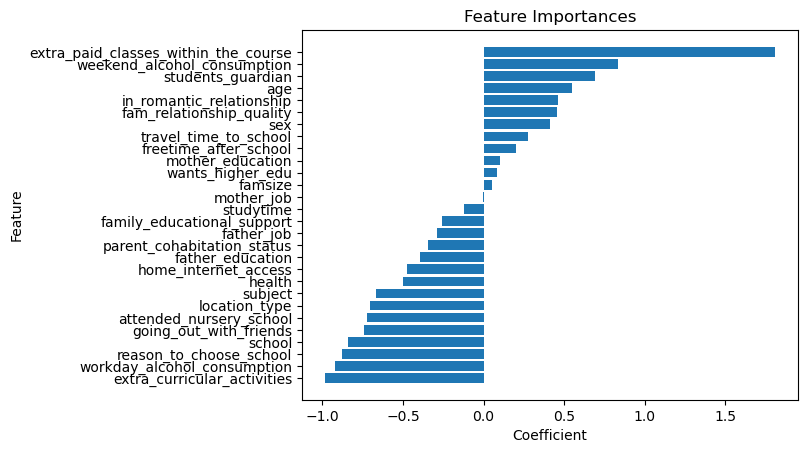

In [ ]:
import matplotlib.pyplot as plt

# Get the logistic regression model from the pipeline
log_reg = best_model.named_steps['classifier']

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Get the feature names from the preprocessor
feature_names = list(X_train.columns)

# Create a dictionary where the keys are the feature names and the values are the coefficients
feature_importances = dict(zip(feature_names, coefficients))

# Sort the dictionary by the coefficient values in ascending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=False))

# Plot the results in a horizontal bar chart
plt.barh(list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

A confusion matrix is visualized to further outline how the model performed in determining labels -- True Negative, False Negative, False Positive, True Positive.

The model outlines a high false negative score, meaning the model more often than not correctly predicted a label as false.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and made predictions
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the quadrants
quadrants = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Use the Blues colormap for a softer gradient
disp.plot(cmap='Blues', ax=ax)

#### Decision Tree Classifier

Initalize a decision tree classifier using the same steps outlined in the pipeline to determine how the model would run if we were to measure insights using a decision tree classifier.

This will be applied later on when comparing model performance.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
decision_tree_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("AUC Score:", decision_tree_auc_score)

AUC Score: 0.6854191438763377


#### Gradient Boosting Classifier

Initalize a Gradient Boosting classifier using the same steps outlined in the pipeline to determine how the model would run if we were to measure insights using a Gradient Boosting classifier.

This will be applied later on when comparing model performance.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.05, 0.01],
    'classifier__max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
gb_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("AUC Score:", gb_auc_score)


AUC Score: 0.7990487514863257


#### XGBoost

Initalize a XGBClassifier using the same steps outlined in the pipeline to determine how the model would run if we were to measure insights using a XGBClassifier.

This will be applied later on when comparing model performance.

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
y_new = y.map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_new, shuffle = True, random_state = 42)

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
xgb_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the best parameters and AUC score
print("Best Parameters:", grid_search.best_params_)
print("AUC Score:", xgb_auc_score)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
AUC Score: 0.7030321046373365


Visualize accuracy across all models to determine insights on how different models would perform on this data, used in conjunction with the insights from autogluon.

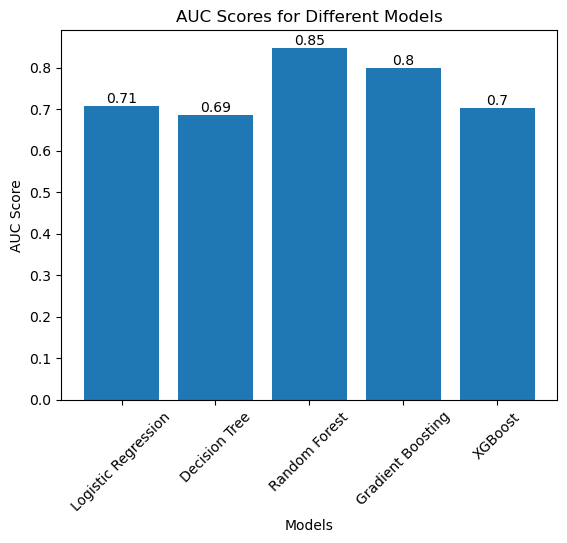

0.7079369797859691 0.6854191438763377 0.8478002378121284 0.7990487514863257 0.7030321046373365


In [ ]:
import matplotlib.pyplot as plt

# Define the scores
scores = [log_reg_auc_score, decision_tree_auc_score, rand_forest_auc_score, gb_auc_score, xgb_auc_score]

# Define the labels
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Create the bar chart
plt.bar(labels, scores)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Models')

for i, score in enumerate(scores):
    plt.text(i, score, str(round(score, 2)), ha='center', va='bottom')

plt.xticks(rotation=45)

# Display the chart
plt.show()
print(log_reg_auc_score, decision_tree_auc_score, rand_forest_auc_score, gb_auc_score, xgb_auc_score)

# <a id='toc4_'></a>[Which feature are most influential on alcohol consumptions, comparison between weekday and weekend](#toc0_)

## <a id='toc4_1_'></a>[DALC](#toc0_)

###### <a id='toc4_1_1_1_1_1_'></a>[Dalc ~ choosen because we are examining school factors on alcohol consumption which transpires on week days](#toc0_)

Create three variables that categorize the features of interest by type.

In [ ]:
continuous_columns = ['age', 'absences', 'first_period_grade', 'second_period_grade', 'third_period_grade', 'Average_Grade']
nominal_columns = ['school','sex' ,'location_type' ,'famsize' ,'parent_cohabitation_status','mother_education' ,'father_education','mother_job' ,'father_job','reason_to_choose_school' ,'students_guardian','travel_time_to_school',
'studytime','past_class_failures','extra_educational_support' ,'family_educational_support' ,'extra_paid_classes_within_the_course' ,'extra_curricular_activities' ,'attended_nursery_school' ,'wants_higher_edu' ,'home_internet_access' ,'in_romantic_relationship', 'subject']
ordinal_columns = ['fam_relationship_quality', 'freetime_after_school', 'going_out_with_friends', 'health']


total_cols = nominal_columns  + ordinal_columns + continuous_columns

Split the data into independent features (X) and the dependent feature (y)

In [ ]:
X = df[total_cols]
y = df['workday_alcohol_consumption']

Create a column transformer to impute, encode, and scale the data. It will be included in the pipeline later to ensure the data is preprocessed before models are trained and fit.

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns),
        ('continuous', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),
    ],
    remainder='drop'
)

Preprocess the independent features using the Column Transformer.

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

Data is split once more, instead having the preprocessed data. This is done so that when autogluon is ran it can use the data without having to fit through pipeline.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, shuffle = True, random_state = 42)

#### <a id='toc3_1_1_1_'></a>[AutoGluon](#toc0_)

Adjust the properties of the dataframe to ensure it is the right shape for autogluon.

In [ ]:
train_df = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

Establish the tabular predictor model.

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(train_df)

ModuleNotFoundError: No module named 'autogluon'

Train the autogluon model using the data provided, providing the basis to compare accuracy across a number of machine learning models.

In [ ]:
from autogluon.tabular import TabularPredictor
label = 'workday_alcohol_consumption' # specifies which column do we want to predict
predictor = TabularPredictor(label=label, path='any').fit(train_data, time_limit=600)


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "any"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.2.0: Wed Nov 15 21:54:10 PST 2023; root:xnu-10002.61.3~2/RELEASE_X86_64
CPU Count:          8
Memory Avail:       2.13 GB /

	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 77 | ['0', '1', '2', '3', '4', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 10 | ['67', '68', '69', '70', '71', ...]
		('int', ['bool']) : 67 | ['0', '1', '2', '3', '4', ...]
	1.2s = Fit runtime
	77 features in original data used to generate 77 features in processed data.
	Train Data (Processed) Memory Usage: 0.11 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 1.32s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 626, Val Rows: 157
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': '

Load the file containing the data on the initialized autogluon model.

In [ ]:
test_data = TabularDataset(test_df)
y_test = test_data[label] # values to predict
test_data_nolab = test_data.drop(columns=[label])
predictor = TabularPredictor.load(save_path)

Display the leaderboard of ML models and their respective accuracy score to determine insights into how models will perform with the data.

In [ ]:
y_pred = predictor.predict(test_data_nolab)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics={'auc'})
leaderboard = predictor.leaderboard(test_data, silent=True)
display(leaderboard, perf)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.812261,0.783439,accuracy,0.172950,0.113301,1.028296,0.172950,0.113301,1.028296,1,True,8
1,CatBoost,0.808429,0.802548,accuracy,0.015975,0.009696,11.408234,0.015975,0.009696,11.408234,1,True,6
2,WeightedEnsemble_L2,0.808429,0.808917,accuracy,0.194011,0.128206,13.809912,0.005086,0.005209,1.373382,2,True,11
3,ExtraTreesGini,0.800766,0.777070,accuracy,0.181968,0.115261,0.992817,0.181968,0.115261,0.992817,1,True,7
4,RandomForestEntr,0.789272,0.783439,accuracy,0.215099,0.145655,1.869526,0.215099,0.145655,1.869526,1,True,5
5,RandomForestGini,0.777778,0.764331,accuracy,0.266201,0.144963,1.224049,0.266201,0.144963,1.224049,1,True,4
6,XGBoost,0.766284,0.770701,accuracy,0.120298,0.023503,1.651058,0.120298,0.023503,1.651058,1,True,9
7,NeuralNetFastAI,0.758621,0.764331,accuracy,0.098632,0.035126,2.585892,0.098632,0.035126,2.585892,1,True,3
8,KNeighborsUnif,0.708812,0.662420,accuracy,0.025588,0.036700,0.123544,0.025588,0.036700,0.123544,1,True,1
9,NeuralNetTorch,0.674330,0.713376,accuracy,0.034573,0.018059,4.447624,0.034573,0.018059,4.447624,1,True,10


{'accuracy': 0.8084291187739464,
 'balanced_accuracy': 0.4569445650600666,
 'mcc': 0.5057436205788433}

### <a id='toc4_1_2_'></a>[Random Forest Entropy](#toc0_)

The data is split from the parent data frame, that is not preprocessed, into training and testing data.

Random state is set to determine a form of consistency across run times. Furthermore, no testing size / training size is coded, as such default split is applied -- 75% training data and 25% testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, shuffle = True, random_state = 42)

A pipeline is defined with an associated parameter grid. The pipeline outlines the steps for the random forest classifier model that will be initalized a) preprocess the data for the model b) initalize the model.

When initalizing the model, a parameter grid is applied with scoring functionality "ROC_AUC" to determine the optimal hyperparameters that will raise AUC score. The gridsearch CV is ran with a CV of 5 to look at how the model performs across a number of folds.

Once the grid search model is initalized, the model reports the optimal AUC score determined with the model's optimal hyperparameters defined in the grid search.

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns)
    ],
    remainder='drop'
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='entropy'))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [400, 800, 1100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
auc_score_ovo = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovo')

# Using the One-vs-Rest strategy
rand_forest_auc_score_ovr = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the AUC scores
print("AUC Score (One-vs-One):", auc_score_ovo)
print("AUC Score (One-vs-Rest):", rand_forest_auc_score_ovr)

AUC Score (One-vs-One): 0.8329516451970861
AUC Score (One-vs-Rest): 0.8618566311653482


Feature importance is visualized to offer a visual insight into how features played a pivotal role across the number of tree models. It is sorted in descending order to showcase which features was most influential to least influential.

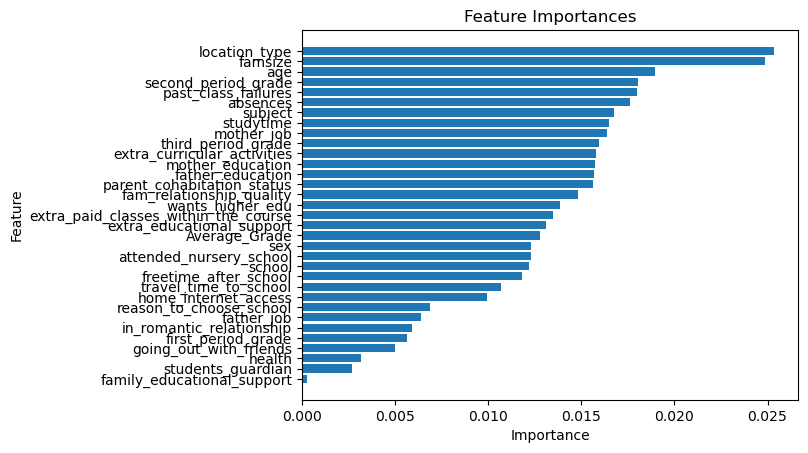

In [ ]:
import matplotlib.pyplot as plt

rand_forest = best_model.named_steps['classifier']

# Get the feature importances from the Random Forest Classifier model
importances = rand_forest.feature_importances_

# Get the feature names from the dataset
feature_names = list(X_train.columns)

# Create a dictionary where the keys are the feature names and the values are the feature importances
feature_importances = dict(zip(feature_names, importances))

# Sort the dictionary by the feature importance values in ascending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=False))

# Plot the results in a horizontal bar chart
plt.barh(list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

A confusion matrix is visualized to further outline how the model performed in determining labels -- True Negative, False Negative, False Positive, True Positive.

The model outlines a high false negative score, meaning the model more often than not correctly predicted a label as false.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and made predictions
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the quadrants
quadrants = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Use the Blues colormap for a softer gradient
disp.plot(cmap='Blues', ax=ax)

### <a id='toc4_1_3_'></a>[Logistic Regression](#toc0_)

Redefine the preprocessor

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns),
        ('continuous', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),
    ],
    remainder='drop'
)

A pipeline is defined with an associated parameter grid. The pipeline outlines the steps for the logistic regression classifier model that will be initalized a) preprocess the data for the model b) initalize the model.

when initalizing the model, a parameter grid is applied with scoring functionality "ROC_AUC" to determine the optimal hyperparameters that will raise AUC score. The gridsearch CV is ran with a CV of 5 to look at how the model performs across a number of folds.

Once the grid search model is initalized, the model reports the optimal AUC score determined with the model's optimal hyperparameters defined in the grid search and which specific parameters it applied.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}



In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
auc_score_ovo = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovo')

# Using the One-vs-Rest strategy
log_reg_auc_score_ovr = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the AUC scores
print("AUC Score (One-vs-One):", auc_score_ovo)
print("AUC Score (One-vs-Rest):", log_reg_auc_score_ovr)

AUC Score (One-vs-One): 0.6197017537511458
AUC Score (One-vs-Rest): 0.704061818622908


Coefficient values for columns in the model is visualized to offer a visual insight into the relationship of features in predicting log odds.

Depending on the sign of the coefficient (if positive or negative) the relationship of the feature is defined. Positve coefficient values determine a positive relationship, where an increase in that feature will raise log odds. Negative coefficient values determine a negative relationship, where a decrease in that feature will decrease log odds.

The coefficient integer values determine the magnitude of the relationship. A higher integer value (closter to 1 or -1) means a stronger relationship, a lesser integer value (closer to 0) means a weaker relationship.

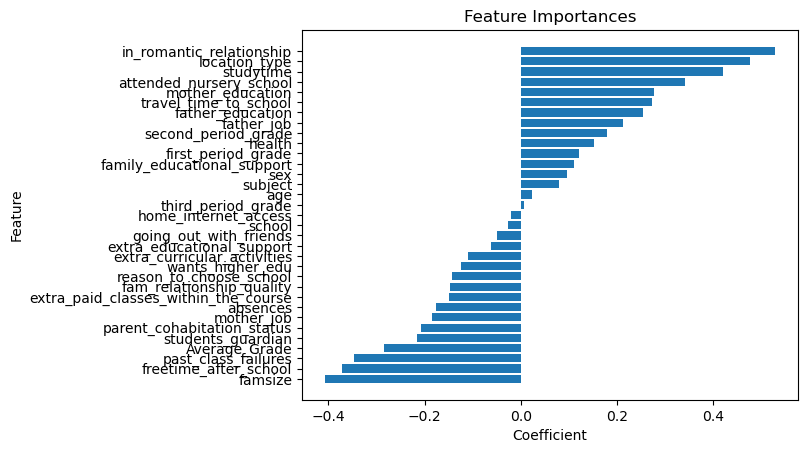

In [ ]:
log_reg = best_model.named_steps['classifier']

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Get the feature names from the preprocessor
feature_names = list(X_train.columns)

# Create a dictionary where the keys are the feature names and the values are the coefficients
feature_importances = dict(zip(feature_names, coefficients))

# Sort the dictionary by the coefficient values in ascending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=False))

# Plot the results in a horizontal bar chart
plt.barh(list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

A confusion matrix is visualized to further outline how the model performed in determining labels -- True Negative, False Negative, False Positive, True Positive.

The model outlines a high false negative score, meaning the model more often than not correctly predicted a label as false.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and made predictions
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the quadrants
quadrants = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Use the Blues colormap for a softer gradient
disp.plot(cmap='Blues', ax=ax)

### Graph

Visualize accuracy across all models to determine insights on how different models would perform on this data, used in conjunction with the insights from autogluon.

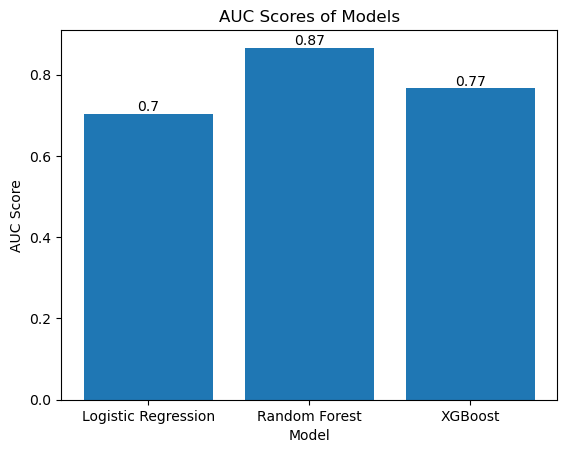

In [ ]:
autogluon_xgboost_score = 0.766284
auc_scores = [log_reg_auc_score_ovr, rand_forest_auc_score_ovr, autogluon_xgboost_score]

# Names of the models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Create a bar plot
bars = plt.bar(models, auc_scores)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Models')

# Add the AUC scores above the bars
for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

## <a id='toc4_2_'></a>[Walc](#toc0_)

Create three variables that categorize the features of interest by type.

In [ ]:
continuous_columns = ['age', 'absences', 'first_period_grade', 'second_period_grade', 'third_period_grade', 'Average_Grade']
nominal_columns = ['school','sex' ,'location_type' ,'famsize' ,'parent_cohabitation_status','mother_education' ,'father_education','mother_job' ,'father_job','reason_to_choose_school' ,'students_guardian','travel_time_to_school',
'studytime','past_class_failures','extra_educational_support' ,'family_educational_support' ,'extra_paid_classes_within_the_course' ,'extra_curricular_activities' ,'attended_nursery_school' ,'wants_higher_edu' ,'home_internet_access' ,'in_romantic_relationship', 'subject']
ordinal_columns = ['fam_relationship_quality', 'freetime_after_school', 'going_out_with_friends', 'health']


total_cols = nominal_columns  + ordinal_columns + continuous_columns

Split the data into independent features (X) and the dependent feature (y)


In [ ]:
X = df[total_cols]
y = df['weekend_alcohol_consumption']

Create a column transformer to impute, encode, and scale the data. It will be included in the pipeline later to ensure the data is preprocessed before models are trained and fit.

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns),
        ('continuous', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),
    ],
    remainder='drop'
)

Preprocess the independent features using the Column Transformer.

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

Data is split once more, instead having the preprocessed data. This is done so that when autogluon is ran it can use the data without having to fit through pipeline.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, shuffle = True, random_state = 42)

#### <a id='toc3_1_1_1_'></a>[AutoGluon](#toc0_)

Adjust the properties of the dataframe to ensure it is the right shape for autogluon.

In [ ]:
train_df = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

Establish the tabular predictor model.

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(train_df)

Train the autogluon model using the data provided, providing the basis to compare accuracy across a number of machine learning models.

In [ ]:
from autogluon.tabular import TabularPredictor
label = 'weekend_alcohol_consumption' # specifies which column do we want to predict
predictor = TabularPredictor(label=label, path='any').fit(train_data, time_limit=600)


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "any"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.2.0: Wed Nov 15 21:54:10 PST 2023; root:xnu-10002.61.3~2/RELEASE_X86_64
CPU Count:          8
Memory Avail:       2.75 GB /

Load the file containing the data on the initialized autogluon model.

In [ ]:
test_data = TabularDataset(test_df)
y_test = test_data[label] # values to predict
test_data_nolab = test_data.drop(columns=[label])
predictor = TabularPredictor.load(save_path)

Display the leaderboard of ML models and their respective accuracy score to determine insights into how models will perform with the data.

In [ ]:
y_pred = predictor.predict(test_data_nolab)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics={'auc'})
leaderboard = predictor.leaderboard(test_data, silent=True)
display(leaderboard, perf)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.685824,0.592357,accuracy,0.136642,0.113263,0.927658,0.136642,0.113263,0.927658,1,True,8
1,ExtraTreesGini,0.674330,0.579618,accuracy,0.151745,0.100267,1.015488,0.151745,0.100267,1.015488,1,True,7
2,RandomForestEntr,0.670498,0.592357,accuracy,0.157250,0.100795,1.023288,0.157250,0.100795,1.023288,1,True,5
3,RandomForestGini,0.655172,0.585987,accuracy,0.207161,0.099017,0.912552,0.207161,0.099017,0.912552,1,True,4
4,WeightedEnsemble_L2,0.643678,0.662420,accuracy,0.254107,0.131280,3.242198,0.004691,0.000771,0.840714,2,True,11
5,XGBoost,0.628352,0.643312,accuracy,0.075093,0.009942,1.372864,0.075093,0.009942,1.372864,1,True,9
6,NeuralNetFastAI,0.613027,0.605096,accuracy,0.041562,0.017152,1.650133,0.041562,0.017152,1.650133,1,True,3
7,CatBoost,0.601533,0.636943,accuracy,0.014175,0.007015,3.942254,0.014175,0.007015,3.942254,1,True,6
8,KNeighborsUnif,0.398467,0.407643,accuracy,0.022578,0.020300,0.013132,0.022578,0.020300,0.013132,1,True,1
9,KNeighborsDist,0.390805,0.394904,accuracy,0.022811,0.017274,0.008162,0.022811,0.017274,0.008162,1,True,2


{'accuracy': 0.6436781609195402,
 'balanced_accuracy': 0.6033870750632873,
 'mcc': 0.4997947742894954}

### <a id='toc4_2_1_'></a>[Random Forest Entropy](#toc0_)

The data is split from the parent data frame, that is not preprocessed, into training and testing data.

Random state is set to determine a form of consistency across run times. Furthermore, no testing size / training size is coded, as such default split is applied -- 75% training data and 25% testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, shuffle = True, random_state = 42)

A pipeline is defined with an associated parameter grid. The pipeline outlines the steps for the random forest classifier model that will be initalized a) preprocess the data for the model b) initalize the model.

When initalizing the model, a parameter grid is applied with scoring functionality "ROC_AUC" to determine the optimal hyperparameters that will raise AUC score. The gridsearch CV is ran with a CV of 5 to look at how the model performs across a number of folds.

Once the grid search model is initalized, the model reports the optimal AUC score determined with the model's optimal hyperparameters defined in the grid search.

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns)
    ],
    remainder='drop'
)

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='entropy'))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [400, 800, 1100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
auc_score_ovo = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovo')

# Using the One-vs-Rest strategy
rand_forest_auc_score_ovr = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the AUC scores
print("AUC Score (One-vs-One):", auc_score_ovo)
print("AUC Score (One-vs-Rest):", rand_forest_auc_score_ovr)


AUC Score (One-vs-One): 0.9085816744190683
AUC Score (One-vs-Rest): 0.9085597604934108


Feature importance is visualized to offer a visual insight into how features played a pivotal role across the number of tree models. It is sorted in descending order to showcase which features was most influential to least influential.

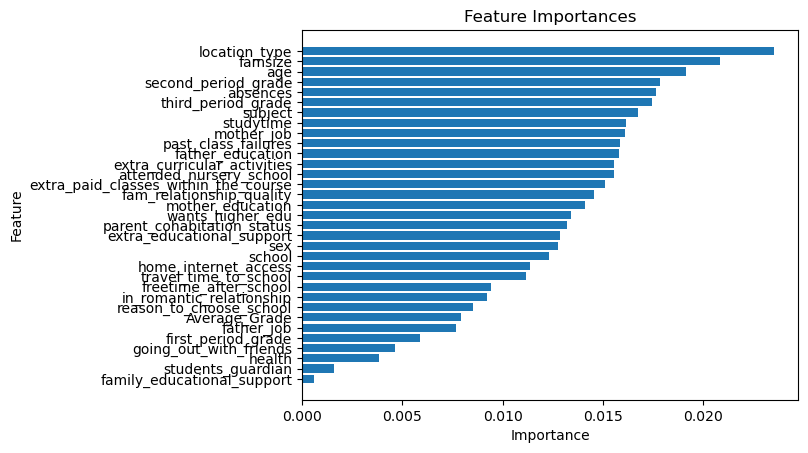

In [ ]:
rand_forest = best_model.named_steps['classifier']

# Get the feature importances from the Random Forest Classifier model
importances = rand_forest.feature_importances_

# Get the feature names from the dataset
feature_names = list(X_train.columns)

# Create a dictionary where the keys are the feature names and the values are the feature importances
feature_importances = dict(zip(feature_names, importances))

# Sort the dictionary by the feature importance values in ascending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=False))

# Plot the results in a horizontal bar chart
plt.barh(list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

A confusion matrix is visualized to further outline how the model performed in determining labels -- True Negative, False Negative, False Positive, True Positive.

The model outlines a high false negative score, meaning the model more often than not correctly predicted a label as false.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and made predictions
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the quadrants
quadrants = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Use the Blues colormap for a softer gradient
disp.plot(cmap='Blues', ax=ax)

### <a id='toc4_2_2_'></a>[Logistic Regression](#toc0_)

Redefine the preprocessor

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns),
        ('continuous', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),
    ],
    remainder='drop'
)

A pipeline is defined with an associated parameter grid. The pipeline outlines the steps for the logistic regression classifier model that will be initalized a) preprocess the data for the model b) initalize the model.

when initalizing the model, a parameter grid is applied with scoring functionality "ROC_AUC" to determine the optimal hyperparameters that will raise AUC score. The gridsearch CV is ran with a CV of 5 to look at how the model performs across a number of folds.

Once the grid search model is initalized, the model reports the optimal AUC score determined with the model's optimal hyperparameters defined in the grid search and which specific parameters it applied.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
auc_score_ovo = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovo')

# Using the One-vs-Rest strategy
log_reg_auc_score_ovr = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the AUC scores
print("AUC Score (One-vs-One):", auc_score_ovo)
print("AUC Score (One-vs-Rest):", log_reg_auc_score_ovr)

AUC Score (One-vs-One): 0.6733524511532754
AUC Score (One-vs-Rest): 0.6852489481917979


Coefficient values for columns in the model is visualized to offer a visual insight into the relationship of features in predicting log odds.

Depending on the sign of the coefficient (if positive or negative) the relationship of the feature is defined. Positve coefficient values determine a positive relationship, where an increase in that feature will raise log odds. Negative coefficient values determine a negative relationship, where a decrease in that feature will decrease log odds.

The coefficient integer values determine the magnitude of the relationship. A higher integer value (closter to 1 or -1) means a stronger relationship, a lesser integer value (closer to 0) means a weaker relationship.

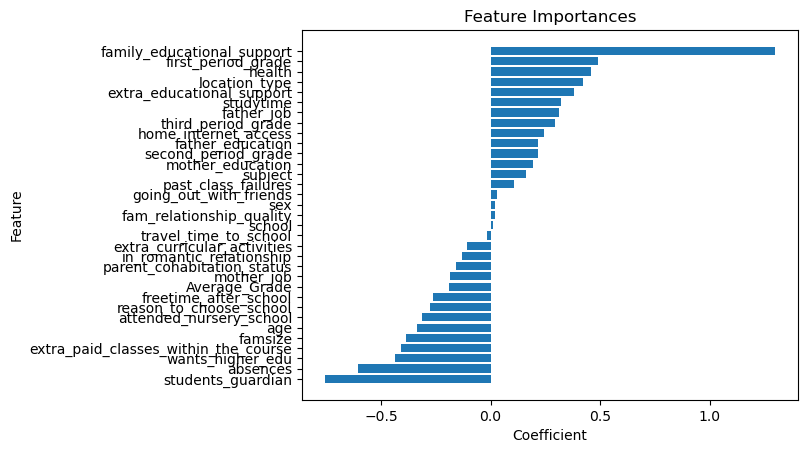

In [ ]:
log_reg = best_model.named_steps['classifier']

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Get the feature names from the preprocessor
feature_names = list(X_train.columns)

# Create a dictionary where the keys are the feature names and the values are the coefficients
feature_importances = dict(zip(feature_names, coefficients))

# Sort the dictionary by the coefficient values in ascending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=False))

# Plot the results in a horizontal bar chart
plt.barh(list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and made predictions
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the quadrants
quadrants = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Use the Blues colormap for a softer gradient
disp.plot(cmap='Blues', ax=ax)

### Graph

Visualize accuracy across all models to determine insights on how different models would perform on this data, used in conjunction with the insights from autogluon.

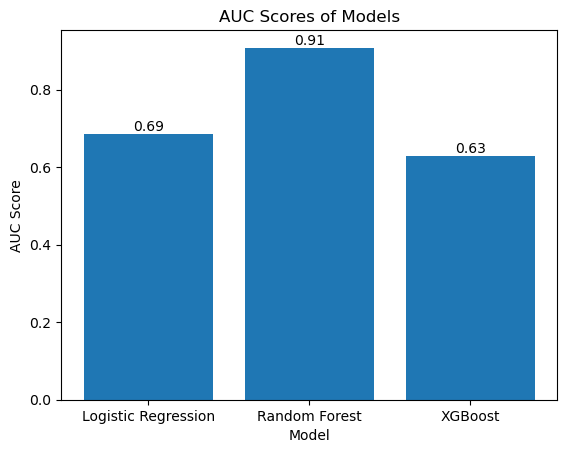

In [ ]:
walc_xgboost_auc_score = 0.628352

auc_scores = [log_reg_auc_score_ovr, rand_forest_auc_score_ovr, walc_xgboost_auc_score]

# Names of the models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Create a bar plot
bars = plt.bar(models, auc_scores)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Models')

# Add the AUC scores above the bars
for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

# <a id='toc5_'></a>[Can we predict if kids are interested in higher education and target these students](#toc0_)

Create three variables that categorize the features of interest by type.

In [ ]:
continuous_columns = ['age', 'absences', 'first_period_grade', 'second_period_grade', 'third_period_grade']
nominal_columns = ['school','sex' ,'location_type' ,'mother_education' ,'father_education','mother_job' ,'father_job','reason_to_choose_school' ,'students_guardian','travel_time_to_school',
                   'studytime','past_class_failures','extra_educational_support' ,'extra_paid_classes_within_the_course' ,'extra_curricular_activities' ,'attended_nursery_school','home_internet_access' ,
                   'in_romantic_relationship', 'subject','famsize' , 'parent_cohabitation_status']
ordinal_columns = ['freetime_after_school', 'going_out_with_friends', 'workday_alcohol_consumption', 'weekend_alcohol_consumption', 'health']

In [ ]:
total_cols = nominal_columns + continuous_columns + ordinal_columns

Create a column transformer to impute, encode, and scale the data. It will be included in the pipeline later to ensure the data is preprocessed before models are trained and fit.

In [ ]:
from sklearn.impute import SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ]), nominal_columns),
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ordinal_columns),
        ('continuous', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), continuous_columns),
    ],
    remainder='drop'
)

Split the data into independent features (X) and the dependent feature (y)

In [ ]:
X = df[total_cols]
y = df['wants_higher_edu']

Preprocess the independent features using the Column Transformer.

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

Split the data. This is done so that when autogluon is ran it can use the data without having to fit through pipeline.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, shuffle = True, random_state = 42)

#### <a id='toc3_1_1_1_'></a>[AutoGluon](#toc0_)

In [ ]:
train_df = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

Establish the tabular predictor model.

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(train_df)

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
from autogluon.tabular import TabularPredictor
save_path = 'any'
label = 'wants_higher_edu' # specifies which column do we want to predict
predictor = TabularPredictor(label=label, path='any').fit(train_data, time_limit=600)


ModuleNotFoundError: No module named 'autogluon'

In [ ]:
test_data = TabularDataset(test_df)
y_test = test_data[label] # values to predict

In [ ]:
test_data_nolab = test_data.drop(columns=[label])

Train the autogluon model using the data provided, providing the basis to compare accuracy across a number of machine learning models.

In [ ]:
predictor = TabularPredictor.load(save_path)

In [ ]:
y_pred = predictor.predict(test_data_nolab)

Display the leaderboard of ML models and their respective accuracy score to determine insights into how models will perform with the data.

In [ ]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics={'auc'})
leaderboard = predictor.leaderboard(test_data, silent=True)
display(leaderboard, perf)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.942529,0.955414,accuracy,0.064960,0.045421,3.195816,0.005027,0.001308,0.845586,2,True,11
1,CatBoost,0.931034,0.942675,accuracy,0.017850,0.006245,1.083520,0.017850,0.006245,1.083520,1,True,5
2,ExtraTreesGini,0.927203,0.917197,accuracy,0.138474,0.090440,0.769829,0.138474,0.090440,0.769829,1,True,6
3,RandomForestGini,0.923372,0.923567,accuracy,0.289699,0.091370,0.966122,0.289699,0.091370,0.966122,1,True,3
4,KNeighborsDist,0.919540,0.929936,accuracy,0.020592,0.017244,0.008947,0.020592,0.017244,0.008947,1,True,2
5,KNeighborsUnif,0.919540,0.929936,accuracy,0.023848,0.017899,0.008145,0.023848,0.017899,0.008145,1,True,1
6,ExtraTreesEntr,0.919540,0.917197,accuracy,0.125432,0.082975,0.807049,0.125432,0.082975,0.807049,1,True,7
7,RandomForestEntr,0.919540,0.923567,accuracy,0.233463,0.096134,0.806293,0.233463,0.096134,0.806293,1,True,4
8,XGBoost,0.911877,0.942675,accuracy,0.018405,0.006274,0.369182,0.018405,0.006274,0.369182,1,True,9
9,NeuralNetTorch,0.908046,0.936306,accuracy,0.023402,0.016563,3.171417,0.023402,0.016563,3.171417,1,True,10


{'accuracy': 0.9425287356321839,
 'balanced_accuracy': 0.6797261316089769,
 'mcc': 0.5473057214040686,
 'f1': 0.969450101832994,
 'precision': 0.9444444444444444,
 'recall': 0.99581589958159}

#### <a id='toc3_1_1_1_'></a>[Models](#toc0_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the logistic regression model
logreg = LogisticRegression(solver = 'saga', max_iter=10000, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
log_reg_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Output the results
print("Best AUC Score:", log_reg_auc_score)
print("Best Hyperparameters:", best_params)


Best AUC Score: 0.8780905287181437
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


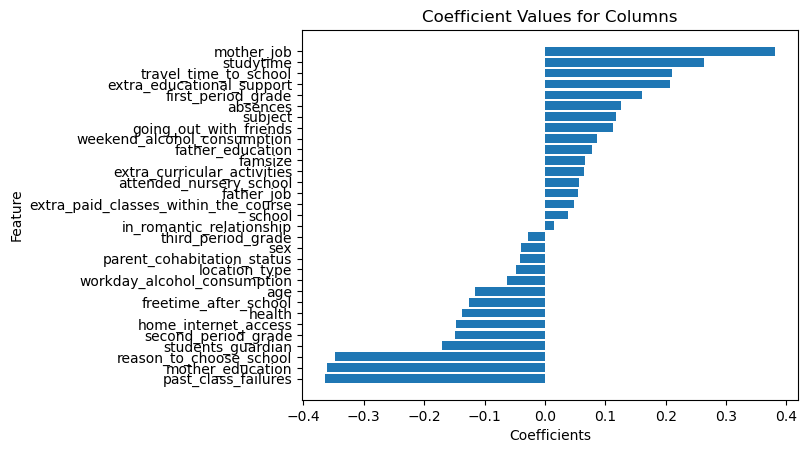

In [ ]:
best_logistic_regression = grid_search.best_estimator_
best_coefficients = best_logistic_regression.coef_
result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients[0])}

sorted_keys = sorted(result_dict, key=result_dict.get, reverse=False)
sorted_values = [result_dict[key] for key in sorted_keys]

plt.barh(sorted_keys, sorted_values)
plt.xlabel('Coefficients')
plt.ylabel('Feature')
plt.title('Coefficient Values for Columns')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
dec_tree_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Output the results
print("Best AUC Score:", dec_tree_auc_score)
print("Best Hyperparameters:", best_params)


Best AUC Score: 0.7391593761886648
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
rand_for_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the best parameters and AUC score
print("Best Parameters:", grid_search.best_params_)
print("AUC Score:", rand_for_auc_score)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
AUC Score: 0.9121338912133892


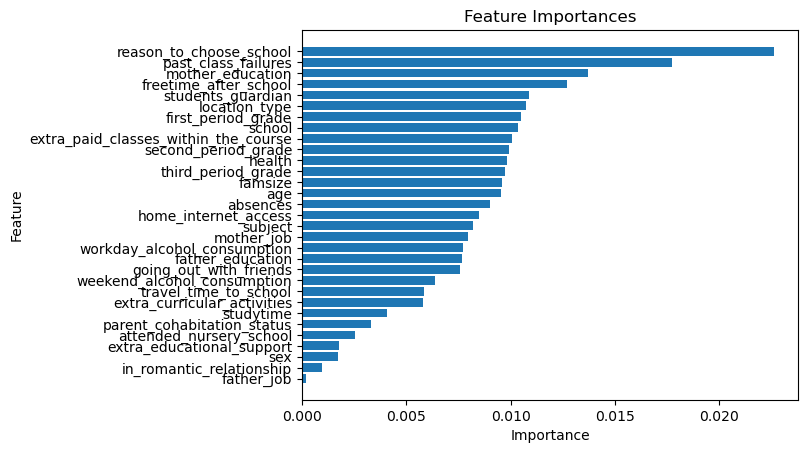

In [ ]:
total_cols = continuous_columns + nominal_columns + ordinal_columns
best_model = grid_search.best_estimator_
best_coefficients = best_model.feature_importances_
result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients)}
import matplotlib.pyplot as plt

result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients)}

sorted_keys = sorted(result_dict, key=result_dict.get, reverse=False)
sorted_values = [result_dict[key] for key in sorted_keys]

plt.barh(sorted_keys, sorted_values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create a gradient boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
grad_boost_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the best parameters and AUC score
print("Best Parameters:", grid_search.best_params_)
print("AUC Score:", grad_boost_auc_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
AUC Score: 0.892734880182579


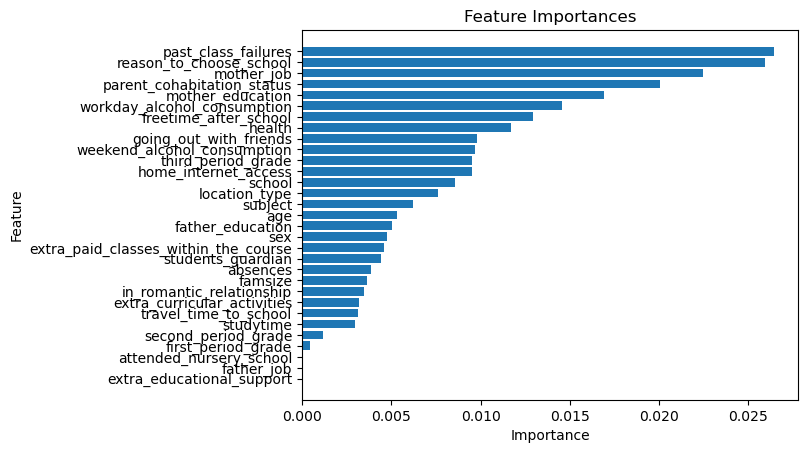

In [ ]:
total_cols = continuous_columns + nominal_columns + ordinal_columns
best_model = grid_search.best_estimator_
best_coefficients = best_model.feature_importances_
result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients)}
import matplotlib.pyplot as plt

result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients)}

sorted_keys = sorted(result_dict, key=result_dict.get, reverse=False)
sorted_values = [result_dict[key] for key in sorted_keys]

plt.barh(sorted_keys, sorted_values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [ ]:
y_new = y.map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_new, shuffle = True, random_state = 42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its AUC score
best_model = grid_search.best_estimator_
xgb_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the best parameters and AUC score
print("Best Parameters:", grid_search.best_params_)
print("AUC Score:", xgb_auc_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
AUC Score: 0.9252567516165843


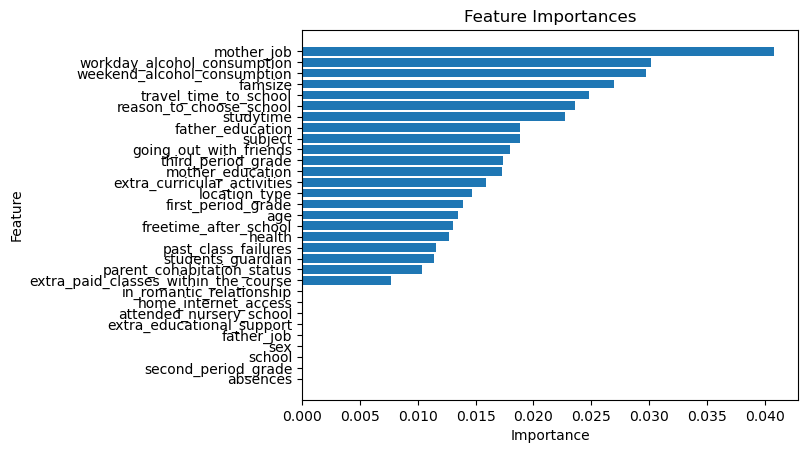

In [ ]:
total_cols = continuous_columns + nominal_columns + ordinal_columns
best_model = grid_search.best_estimator_
best_coefficients = best_model.feature_importances_
result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients)}
import matplotlib.pyplot as plt

result_dict = {col: coef for col, coef in zip(total_cols, best_coefficients)}

sorted_keys = sorted(result_dict, key=result_dict.get, reverse=False)
sorted_values = [result_dict[key] for key in sorted_keys]

plt.barh(sorted_keys, sorted_values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


Visualize accuracy across all models to determine insights on how different models would perform on this data, used in conjunction with the insights from autogluon.

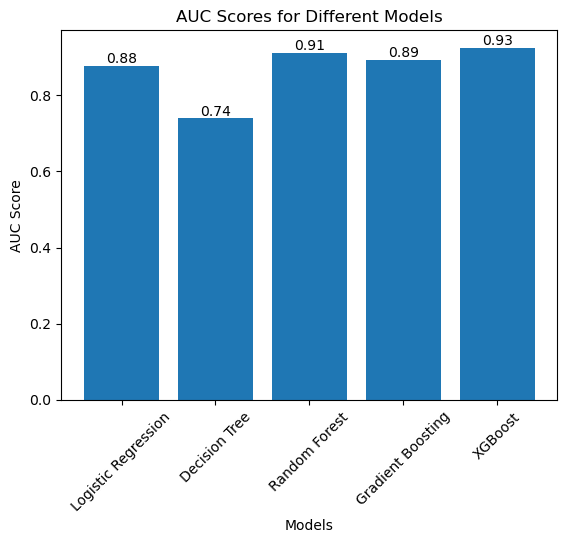

0.8780905287181437 0.7391593761886648 0.9121338912133892 0.892734880182579 0.9252567516165843


In [ ]:
import matplotlib.pyplot as plt

# Define the scores
scores = [log_reg_auc_score, dec_tree_auc_score, rand_for_auc_score, grad_boost_auc_score, xgb_auc_score]

# Define the labels
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Create the bar chart
plt.bar(labels, scores)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Models')

for i, score in enumerate(scores):
    plt.text(i, score, str(round(score, 2)), ha='center', va='bottom')

plt.xticks(rotation=45)

# Display the chart
plt.show()